In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('data_modified/iot.csv')
print(df.shape)
df.head()

(53759, 27)


,unit_ID,cycles,time_to_deterioration,setting_1,setting_2,setting_3,T2,T24,T30,T50,...,phi,NRf,NRc,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32
0,1,1,148,34.9983,0.8400,100.0,449.44,555.32,1358.61,1137.23,...,183.06,2387.72,8048.56,9.3461,0.02,334,2223,100.00,14.73,8.8071
1,1,2,147,41.9982,0.8408,100.0,445.00,549.90,1353.22,1125.78,...,130.42,2387.66,8072.30,9.3774,0.02,330,2212,100.00,10.41,6.2665
2,1,3,146,24.9988,0.6218,60.0,462.54,537.31,1256.76,1047.45,...,164.22,2028.03,7864.87,10.8941,0.02,309,1915,84.93,14.08,8.6723
3,1,4,145,42.0077,0.8416,100.0,445.00,549.51,1354.03,1126.38,...,130.72,2387.61,8068.66,9.3528,0.02,329,2212,100.00,10.59,6.4701
4,1,5,144,25.0005,0.6203,60.0,462.54,537.07,1257.71,1047.93,...,164.31,2028.00,7861.23,10.8963,0.02,309,1915,84.93,14.13,8.5286


In [3]:
df_u1 = df[df['unit_ID']==1]
df_u1

,unit_ID,cycles,time_to_deterioration,setting_1,setting_2,setting_3,T2,T24,T30,T50,...,phi,NRf,NRc,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32
0,1,1,148,34.9983,0.8400,100.0,449.44,555.32,1358.61,1137.23,...,183.06,2387.72,8048.56,9.3461,0.02,334,2223,100.00,14.73,8.8071
1,1,2,147,41.9982,0.8408,100.0,445.00,549.90,1353.22,1125.78,...,130.42,2387.66,8072.30,9.3774,0.02,330,2212,100.00,10.41,6.2665
2,1,3,146,24.9988,0.6218,60.0,462.54,537.31,1256.76,1047.45,...,164.22,2028.03,7864.87,10.8941,0.02,309,1915,84.93,14.08,8.6723
3,1,4,145,42.0077,0.8416,100.0,445.00,549.51,1354.03,1126.38,...,130.72,2387.61,8068.66,9.3528,0.02,329,2212,100.00,10.59,6.4701
4,1,5,144,25.0005,0.6203,60.0,462.54,537.07,1257.71,1047.93,...,164.31,2028.00,7861.23,10.8963,0.02,309,1915,84.93,14.13,8.5286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,1,145,4,35.0007,0.8402,100.0,449.44,556.59,1376.19,1152.04,...,182.61,2387.77,8050.29,9.4189,0.02,338,2223,100.00,14.72,8.8240
145,1,146,3,10.0006,0.2516,100.0,489.05,605.94,1511.92,1326.50,...,370.52,2388.43,8113.02,8.7345,0.03,372,2319,100.00,28.16,16.9984
146,1,147,2,25.0005,0.6200,60.0,462.54,537.50,1268.62,1057.88,...,164.56,2027.97,7866.66,10.9764,0.02,310,1915,84.93,14.34,8.4476
147,1,148,1,0.0024,0.0013,100.0,518.67,643.73,1605.33,1425.76,...,519.76,2388.31,8115.88,8.5240,0.03,397,2388,100.00,38.55,23.0079


In [9]:
df_u1_sensor = df_u1.iloc[:, 3:]
df_u1_sensor.shape

(149, 24)

In [10]:
df_u1_sensor.describe()

,setting_1,setting_2,setting_3,T2,T24,T30,T50,P2,P15,P30,...,phi,NRf,NRc,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,...,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,24.875195,0.582721,94.093960,471.633154,578.220403,1417.841141,1204.313221,7.859262,11.348389,276.063624,...,259.876779,2334.767584,8047.956242,9.356340,0.023490,347.644295,2226.080537,97.774899,20.284899,12.190332
std,15.195746,0.315645,14.238007,27.183640,38.080742,107.830438,121.094160,3.747489,5.619953,150.310502,...,141.684951,128.112540,81.280900,0.739326,0.004783,28.129304,145.056024,5.364169,10.169621,6.075709
min,0.000000,0.000000,60.000000,445.000000,536.250000,1256.760000,1040.990000,3.910000,5.710000,137.570000,...,129.490000,2027.940000,7857.510000,8.389200,0.020000,306.000000,1915.000000,84.930000,10.360000,6.228500
25%,10.006200,0.251300,100.000000,445.000000,549.510000,1352.820000,1126.680000,3.910000,5.720000,138.910000,...,130.790000,2387.620000,8049.060000,8.722300,0.020000,331.000000,2212.000000,100.000000,10.650000,6.430800
50%,25.002500,0.700200,100.000000,462.540000,555.640000,1368.090000,1137.890000,7.050000,9.020000,194.000000,...,182.720000,2387.760000,8066.980000,9.357100,0.020000,334.000000,2223.000000,100.000000,14.780000,8.874000
75%,41.998700,0.840100,100.000000,491.190000,607.510000,1501.820000,1309.650000,10.520000,15.490000,393.520000,...,370.990000,2388.130000,8111.050000,9.395700,0.030000,369.000000,2324.000000,100.000000,28.380000,17.075900
max,42.007700,0.841900,100.000000,518.670000,643.730000,1607.030000,1429.430000,14.620000,21.610000,554.080000,...,521.830000,2388.430000,8128.640000,10.976400,0.030000,397.000000,2388.000000,100.000000,39.040000,23.346400


In [16]:
df_u1_sensor.describe().loc['mean', :]

setting_1      24.875195
setting_2       0.582721
setting_3      94.093960
T2            471.633154
T24           578.220403
T30          1417.841141
T50          1204.313221
P2              7.859262
P15            11.348389
P30           276.063624
Nf           2225.951141
Nc           8494.444698
epr             1.090067
Ps30           43.025034
phi           259.876779
NRf          2334.767584
NRc          8047.956242
BPR             9.356340
farB            0.023490
htBleed       347.644295
Nf_dmd       2226.080537
PCNfR_dmd      97.774899
W31            20.284899
W32            12.190332
Name: mean, dtype: float64

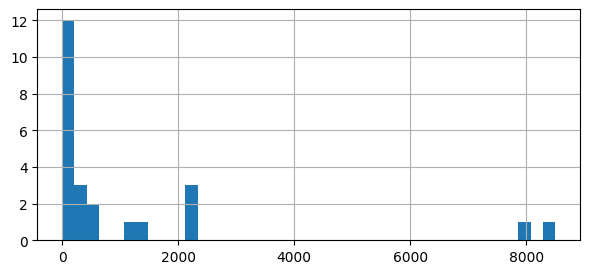

In [22]:
plt.figure(figsize=(7, 3))
plt.hist(df_u1_sensor.describe().loc['mean', :], bins=40)
plt.grid(True)
plt.show()

In [4]:
# プロット
#　　 　　cyclesをX
# 　　　　各センサー値を標準化しY

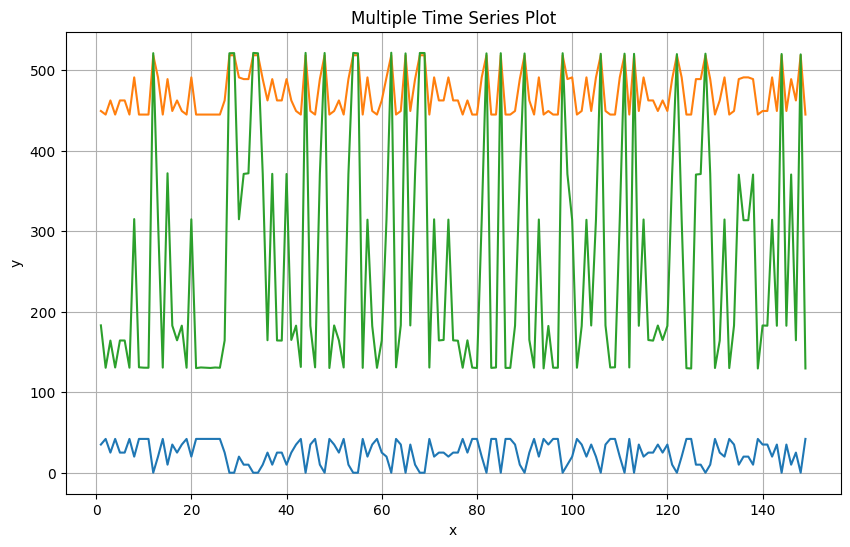

In [12]:
x = df_u1['cycles']

plt.figure(figsize=(10, 6))
plt.plot(x, df_u1_sensor['setting_1'], label='a')
plt.plot(x, df_u1_sensor['T2'], label='b')
plt.plot(x, df_u1_sensor['phi'], label='c')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Multiple Time Series Plot')
#plt.legend()
plt.grid(True)
plt.show()

(149, 24)


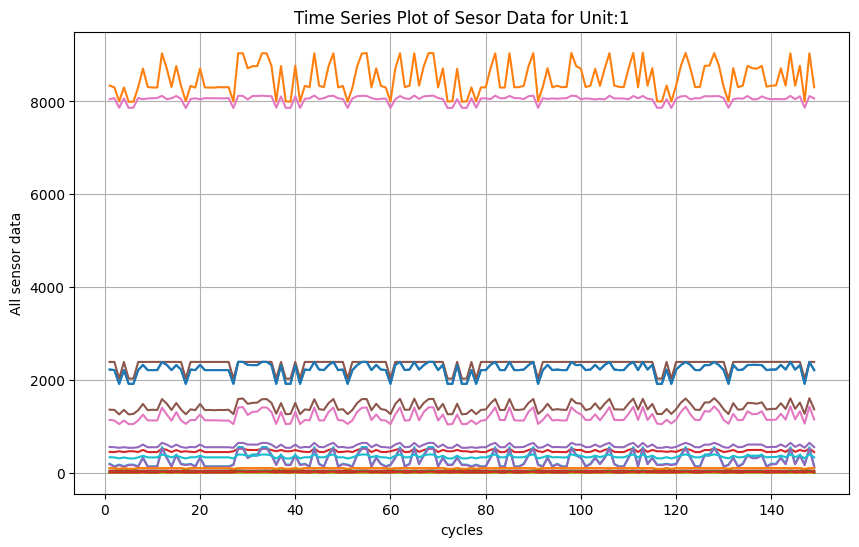

In [46]:
df_plot = df_u1    # プロットしたいDF
unit_id = 1

x = df_plot['cycles']

df_sensor = df_plot.iloc[:, 3:]
print(df_sensor.shape)
columns = df_sensor.columns

plt.figure(figsize=(10, 6))

for col in columns:
    plt.plot(x, df_sensor[col], label=col)

plt.title('Time Series Plot of Sesor Data for Unit:{}'.format(unit_id))
plt.xlabel('cycles')
plt.ylabel('All sensor data')
plt.grid(True)
plt.show()

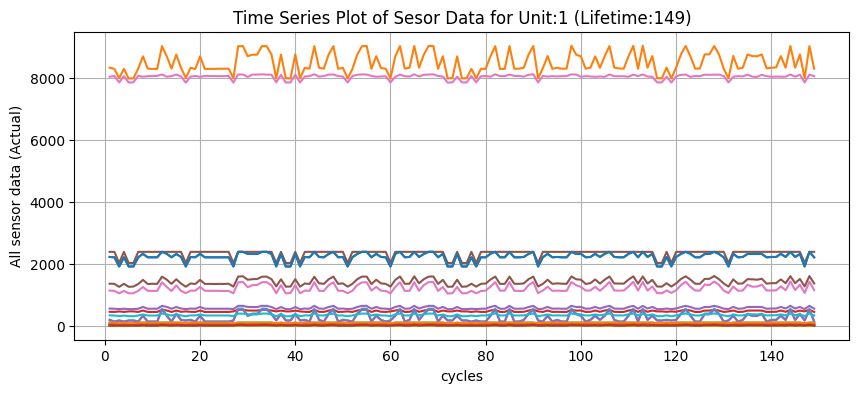

In [77]:
unit_id = 1    # プロットしたいUnit ID

df_plot = df[df['unit_ID']==unit_id]

x = df_plot['cycles']

df_sensor = df_plot.iloc[:, 3:]
#print(df_sensor.shape)
columns = df_sensor.columns


plt.figure(figsize=(10, 4))

for col in columns:
    plt.plot(x, df_sensor[col], label=col)

plt.title('Time Series Plot of Sesor Data for Unit:{} (Lifetime:{})'.format(unit_id, x.tail(1).values[0]))
plt.xlabel('cycles')
plt.ylabel('All sensor data (Actual)')
plt.grid(True)
plt.show()

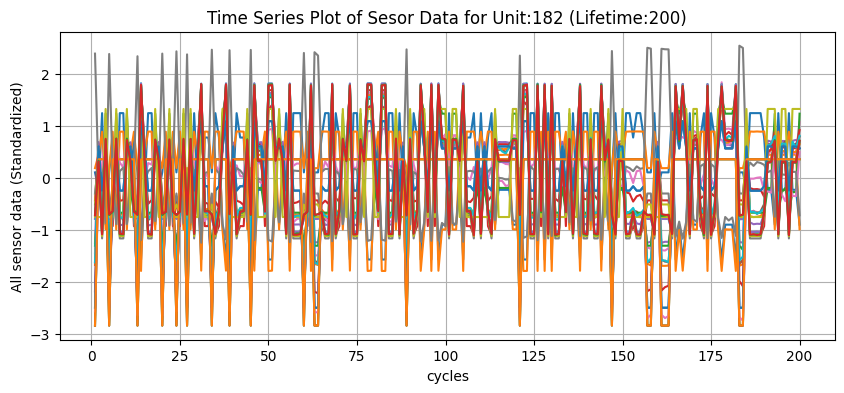

In [86]:
unit_id = 182     # プロットしたいUnit ID

df_plot = df[df['unit_ID']==unit_id]

x = df_plot['cycles']

df_sensor = df_plot.iloc[:, 3:]
#print(df_sensor.shape)
columns = df_sensor.columns

#----- 標準化処理 -----#
scaler = StandardScaler()
scaled_values = scaler.fit_transform(df_sensor)
df_sensor = pd.DataFrame(scaled_values, columns=df_sensor.columns)
#print(df_sensor.shape)
#-------------------------#

plt.figure(figsize=(10, 4))

for col in columns:
    plt.plot(x, df_sensor[col], label=col)

plt.title('Time Series Plot of Sesor Data for Unit:{} (Lifetime:{})'.format(unit_id, x.tail(1).values[0]))
plt.xlabel('cycles')
plt.ylabel('All sensor data (Standardized)')
plt.grid(True)
plt.show()